In [1]:
import csv
import pandas as pd
import numpy as np

In [9]:
print(movies2)

           id  vote_average
0      135397           6.5
1       76341           7.1
2      262500           6.3
3      140607           7.5
4      168259           7.3
...       ...           ...
10861      21           7.4
10862   20379           5.7
10863   39768           6.5
10864   21449           5.4
10865   22293           1.5

[10866 rows x 2 columns]


In [13]:
def remove_dul(data):
    data['id'] = list(map(lambda x: int(x), data['id'].tolist()))
    data = data[~data.id.duplicated(keep='first')]
    data = data.reset_index(drop=True)
    return data
# def replace_value(value):

movie_Info = pd.read_csv('all_movies_meta.csv')
movies = pd.read_csv('movie_info.csv')
movies = movies[['id','vote_average']]
print(movies.shape)
movies2 = pd.read_csv('movies_metadata.csv')
movies2 = movies2[['id','vote_average']]
print(movies2.shape)
def clean_id(x):
    try:
        return int(x)
    except:
        return np.nan




all_movies_rating = movies.append(movies2, ignore_index = True)
all_movies_rating['vote_average'] = all_movies_rating['vote_average'].apply(clean_id)
all_movies_rating['id'] = all_movies_rating['id'].apply(clean_id)
all_movies_rating = all_movies_rating[all_movies_rating['vote_average'].notnull()]
all_movies_rating = all_movies_rating[all_movies_rating['id'].notnull()]
all_movies_rating = remove_dul(all_movies_rating)
all_movies_rating = all_movies_rating.reset_index(drop=True)
print(all_movies_rating)
movies_with_rating = pd.merge(movie_Info, all_movies_rating[['id','vote_average']], on='id', how='left')
# movies_with_rating = pd.merge(movies_with_rating, movies2[['id','vote_average']], on='id', how='left')
# movies_with_rating['vote_average_x'] = list(map(lambda x: , movies_with_rating['vote_average_x'].tolist() ))
movies_meta = remove_dul(movies_with_rating)
# print(movies_meta)



#id有些是空的 先做處裡........




(10866, 2)
(45466, 2)
           id  vote_average
0      135397           6.0
1       76341           7.0
2      262500           6.0
3      140607           7.0
4      168259           7.0
...       ...           ...
45848  439050           4.0
45849  111109           9.0
45850   67758           3.0
45851  227506           0.0
45852  461257           0.0

[45853 rows x 2 columns]


In [14]:

movies_meta = movies_meta.reset_index(drop=True)
print(movies_meta)


           id                               original_title  \
0         862                                    Toy Story   
1        8844                                      Jumanji   
2       15602                             Grumpier Old Men   
3       31357                            Waiting to Exhale   
4       11862                  Father of the Bride Part II   
...       ...                                          ...   
25913  249260                             Avalanche Sharks   
25914   19422                               Lost in Austen   
25915    1777                              Fahrenheit 9/11   
25916   11052  YÅ«giÅ Dyueru MonsutÄzu Hikari no Piramiddo   
25917   15138                              Little Monsters   

                                                    cast  \
0                 ['tomhanks', 'timallen', 'donrickles']   
1      ['robinwilliams', 'jonathanhyde', 'kirstendunst']   
2          ['waltermatthau', 'jacklemmon', 'annmargret']   
3      ['whitne

In [15]:
from ast import literal_eval
cols = ['cast','director','genres','production_companies','keywords']
for c in cols:
    movies_meta[c] = movies_meta[c].apply(literal_eval)
# movies_meta['id'] = movies_meta['id'].astype('int')
movies_meta['original_title'] = movies_meta['original_title'].astype('str')


# movies_meta['original_title'] = movies_meta['original_title'].apply(literal_eval)

In [ ]:
print(movies_meta)

In [17]:
# --title--
import re
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
num = r'[0-9]+'

def clean_string(text):
    text = ''.join([word for word in text if word not in string.punctuation])
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords])
    text = re.sub(num, '', text)
    return text   

movies_meta['original_title'] = list(map(clean_string, movies_meta['original_title']))
print(movies_meta)

           id                            original_title  \
0         862                                 toy story   
1        8844                                   jumanji   
2       15602                          grumpier old men   
3       31357                            waiting exhale   
4       11862                      father bride part ii   
...       ...                                       ...   
25913  249260                          avalanche sharks   
25914   19422                               lost austen   
25915    1777                               fahrenheit    
25916   11052  yå«giå dyueru monsutäzu hikari piramiddo   
25917   15138                           little monsters   

                                                    cast            director  \
0                       [tomhanks, timallen, donrickles]      [johnlasseter]   
1            [robinwilliams, jonathanhyde, kirstendunst]       [joejohnston]   
2                [waltermatthau, jacklemmon, annmar

In [21]:
# movies_meta['original_title'] = list(map(lambda x: list(x.split(" ")), movies_meta['original_title'].tolist()))
movies_meta['original_title']  = list(map(lambda x: [ele for ele in x if ele.strip()], movies_meta['original_title'].tolist()))
print(movies_meta['original_title'])

0                                          [toy, story]
1                                             [jumanji]
2                                  [grumpier, old, men]
3                                     [waiting, exhale]
4                             [father, bride, part, ii]
                              ...                      
25913                               [avalanche, sharks]
25914                                    [lost, austen]
25915                                      [fahrenheit]
25916    [yå«giå, dyueru, monsutäzu, hikari, piramiddo]
25917                                [little, monsters]
Name: original_title, Length: 25918, dtype: object


In [51]:
# movies_meta.drop(['id','release_year'], inplace=True, axis=1)
print(movies_meta)
# movies_meta['original_title'] = movies_meta['original_title'].apply(lambda x: x[:3] if len(x)>3 else x)

                    original_title  \
0                     [toy, story]   
1                        [jumanji]   
2             [grumpier, old, men]   
3                [waiting, exhale]   
4            [father, bride, part]   
...                            ...   
25913          [avalanche, sharks]   
25914               [lost, austen]   
25915                 [fahrenheit]   
25916  [yå«giå, dyueru, monsutäzu]   
25917           [little, monsters]   

                                                    cast            director  \
0                       [tomhanks, timallen, donrickles]      [johnlasseter]   
1            [robinwilliams, jonathanhyde, kirstendunst]       [joejohnston]   
2                [waltermatthau, jacklemmon, annmargret]      [howarddeutch]   
3         [whitneyhouston, angelabassett, lorettadevine]    [forestwhitaker]   
4                [stevemartin, dianekeaton, martinshort]      [charlesshyer]   
...                                                  ...       

In [29]:
from keras_preprocessing.text import Tokenizer
movies_meta_em = movies_meta.copy()
all_str_col = ['original_title','cast','director','genres','production_companies','keywords']
col_concat = []
# dict makes from whole features' words
for c in all_str_col:
    col_concat.extend(movies_meta_em[c].tolist())
# embedding for each col
for c in all_str_col:
    token = Tokenizer()
    token.fit_on_texts(col_concat)
    movies_meta_em[c] = token.texts_to_sequences(movies_meta_em[c].tolist())

In [30]:
print(movies_meta_em)

              original_title                   cast director       genres  \
0                [2673, 140]     [404, 1427, 14887]   [5908]  [14, 2, 10]   
1                    [30694]     [465, 43020, 1203]   [5184]  [8, 12, 10]   
2          [30695, 711, 215]       [662, 663, 1758]   [4575]       [5, 2]   
3              [4786, 30696]     [9191, 2530, 7635]    [640]    [2, 1, 5]   
4            [474, 411, 653]       [746, 695, 3927]   [8149]          [2]   
...                      ...                    ...      ...          ...   
25913         [10902, 10779]  [62030, 15729, 62031]  [17354]    [3, 6, 9]   
25914           [244, 20298]  [62032, 12085, 62033]  [68349]   [2, 1, 10]   
25915                [19784]      [2195, 6694, 670]   [2195]         [15]   
25916  [43017, 43018, 43019]  [62034, 11652, 62035]  [68350]  [8, 12, 14]   
25917            [130, 3526]    [11670, 9478, 3001]  [25866]   [8, 12, 2]   

               production_companies             keywords  vote_average  
0 

In [31]:


# 跑這邊~~~~
from keras.preprocessing import sequence
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# paddind dataset-------------------
all_cols = ['original_title','cast','director','genres','production_companies','keywords']
for feature in all_cols:
    movies_meta_em[feature] = list(sequence.pad_sequences(movies_meta_em[feature].tolist(), maxlen = 3, dtype='float32'))
# print(movies)

# ----data normalization-----
scaler = StandardScaler()
for feature in all_cols:
    movies_meta_em[feature] = list(scaler.fit_transform(movies_meta_em[feature].tolist()))
# normalized_movies = scaler.fit_transform(test_movies)
print(movies_meta_em)

Using TensorFlow backend.


                                          original_title  \
0      [-0.346128993706117, -0.4088484370818867, -0.9...   
1      [-0.346128993706117, -0.623526538045331, 1.014...   
2      [3.161810251729028, -0.5664236088328324, -0.98...   
3      [-0.346128993706117, -0.23914592030831466, 1.0...   
4      [-0.29195850332213724, -0.5905176717916926, -0...   
...                                                  ...   
25913  [-0.346128993706117, 0.25205170987964853, -0.2...   
25914  [-0.346128993706117, -0.603930033505458, 0.333...   
25915  [-0.346128993706117, -0.623526538045331, 0.300...   
25916  [4.570014434242527, 2.8314014631688287, 1.8211...   
25917  [-0.346128993706117, -0.613085777429825, -0.76...   

                                                    cast  \
0      [-0.7170023565440657, -0.8572184321928932, -0....   
1      [-0.7137605110385186, 1.174938095654474, -1.03...   
2      [-0.7032909444058496, -0.8945460495149279, -1....   
3      [-0.2500171687203996, -0.8033279

In [37]:
# split features
# split_movies_meta_em = movies_meta_em.copy()
# all_cols = ['original_title','cast','director','genres','production_companies','vote_average','keywords']
split_movies_meta_em[['p1','p2','p3']] = pd.DataFrame(split_movies_meta_em['production_companies'].tolist(), index= split_movies_meta_em.index)
split_movies_meta_em.drop('production_companies', inplace=True, axis=1)

# print(type(split_movies['vote_ave']))
print(split_movies_meta_em)

       vote_average        k1        k2        k3        o1        o2  \
0               7.0 -0.232862 -0.178200 -0.507153 -0.346129 -0.408848   
1               6.0  1.033617 -0.238312 -0.383120 -0.346129 -0.623527   
2               6.0  0.087511 -0.285747 -0.506864  3.161810 -0.566424   
3               6.0 -0.240611 -0.076469 -0.432865 -0.346129 -0.239146   
4               5.0 -0.231651 -0.267126 -0.311104 -0.291959 -0.590518   
...             ...       ...       ...       ...       ...       ...   
25913           3.0 -0.002208 -0.191725 -0.492527 -0.346129  0.252052   
25914           6.0 -0.243759  0.004486 -0.479347 -0.346129 -0.603930   
25915           6.0  0.106157 -0.104695 -0.290776 -0.346129 -0.623527   
25916           5.0 -0.238432  0.002003 -0.508476  4.570014  2.831401   
25917           5.0 -0.238432 -0.040010 -0.510500 -0.346129 -0.613086   

             o3        c1        c2        c3       d1        d2        d3  \
0     -0.985517 -0.717002 -0.857218 -0.392496

In [38]:
# -----KNN------
# import libs
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LinearRegression
from IPython.display import display
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [40]:
print(movies)

           id  vote_average
0      135397           6.5
1       76341           7.1
2      262500           6.3
3      140607           7.5
4      168259           7.3
...       ...           ...
10861      21           7.4
10862   20379           5.7
10863   39768           6.5
10864   21449           5.4
10865   22293           1.5

[10866 rows x 2 columns]


In [41]:
split_movies_meta_em2 = split_movies_meta_em.copy()
split_movies_meta_em2.drop('vote_average', inplace=True, axis=1)
split_movies_meta_em2['rating'] = list(map(lambda x: 0 if x <= 3 else (1 if x>3 and x < 7 else 2)
, split_movies_meta_em['vote_average'].tolist()))


In [42]:
#define training and validation split
cond = np.random.rand(len(split_movies_meta_em2))>.2
train = np.where(cond)[0]
valid = np.where(~cond)[0]

len(train), len(valid)

(20743, 5175)

In [43]:
train_df = split_movies_meta_em2.iloc[train]
valid_df = split_movies_meta_em2.iloc[valid]
len(train_df), len(valid_df)

(20743, 5175)

In [44]:
train_y = train_df['rating']
train_xs = train_df.drop('rating', axis = 1)

valid_y = valid_df['rating']
valid_xs = valid_df.drop('rating', axis = 1)

print(np.array(valid_y).shape)
print(np.array(valid_xs).shape)

(5175,)
(5175, 18)


In [52]:
print(valid_y)

0        2
1        1
3        1
18       1
24       1
        ..
25893    1
25896    2
25909    1
25913    0
25916    1
Name: rating, Length: 5175, dtype: int64


In [45]:
#train model
m =KNeighborsClassifier()
m = m.fit(train_xs, train_y)


0.691207729468599


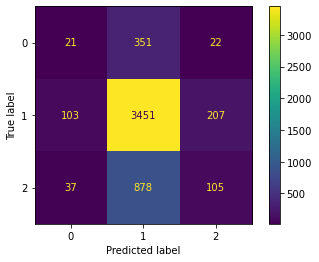

In [46]:
plot_confusion_matrix(estimator = m, X = valid_xs, y_true = valid_y)
std_score = m.score(valid_xs, valid_y) #0.02689143509348857
# use StandardScaler precision is higher   0.0386297664695866
print(std_score)

In [49]:
data = {'o': [0], 'c': [0], 'd': [0], 'g': [0], 'p': [0], 'k': [0]}
feat_imp = pd.DataFrame(data)
feat_imp.head()

,o,c,d,g,p,k
0,0,0,0,0,0,0


In [50]:
# this result is rating to 3 class(0,1,2) and use knn to predict
valid_o = valid_xs.copy()
valid_o['o1'] = np.random.permutation(valid_o['o1'])
valid_o['o2'] = np.random.permutation(valid_o['o2'])
valid_o['o3'] = np.random.permutation(valid_o['o3'])
o_score = m.score(valid_o, valid_y)
feat_imp['o'] = std_score - o_score

valid_c = valid_xs.copy()
valid_c['c1'] = np.random.permutation(valid_c['c1'])
valid_c['c2'] = np.random.permutation(valid_c['c2'])
valid_c['c3'] = np.random.permutation(valid_c['c3'])

c_score = m.score(valid_c, valid_y) #0.02689143509348857

feat_imp['c'] = std_score - c_score
# feat_imp.head()

valid_d = valid_xs.copy()
valid_d['d1'] = np.random.permutation(valid_d['d1'])
valid_d['d2'] = np.random.permutation(valid_d['d2'])
valid_d['d3'] = np.random.permutation(valid_d['d3'])

d_score = m.score(valid_d, valid_y) #0.02689143509348857

feat_imp['d'] = std_score - d_score
# feat_imp.head()

valid_g = valid_xs.copy()
valid_g['g1'] = np.random.permutation(valid_g['g1'])
valid_g['g2'] = np.random.permutation(valid_g['g2'])
valid_g['g3'] = np.random.permutation(valid_g['g3'])

g_score = m.score(valid_g, valid_y) #0.02689143509348857

feat_imp['g'] = std_score - g_score
# feat_imp.head()

valid_p = valid_xs.copy()
valid_p['p1'] = np.random.permutation(valid_p['p1'])
valid_p['p2'] = np.random.permutation(valid_p['p2'])
valid_p['p3'] = np.random.permutation(valid_p['p3'])

p_score = m.score(valid_p, valid_y) #0.02689143509348857
# print(p_score)
feat_imp['p'] = std_score - p_score
# feat_imp.head()

valid_k = valid_xs.copy()
valid_k['k1'] = np.random.permutation(valid_k['k1'])
valid_k['k2'] = np.random.permutation(valid_k['k2'])
valid_k['k3'] = np.random.permutation(valid_k['k3'])

k_score = m.score(valid_k, valid_y) #0.02689143509348857

feat_imp['k'] = std_score - k_score
feat_imp.head()



,o,c,d,g,p,k
0,0.005024,0.006377,0.004058,0.011208,0.013913,0.005024
